# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [74]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000, 10)


In [75]:
X_train_flat = x_train.reshape(x_train.shape[0], -1)

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [136]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    np.random.seed(14)
    W1 = np.random.randn(hidden_size, input_size) * 0.1
    b1 = np.zeros(hidden_size)

    W2 = np.random.randn(output_size, hidden_size) * 0.1
    b2 = np.zeros(output_size)
    return {'W1' : W1, 'b1' : b1, 'W2' : W2, 'b2' : b2}


TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [126]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [127]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(X, W1.T) + b1.T
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2.T) + b2.T
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [128]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    m = y_true.shape[0]
    epsilon = 1e-8
    loss = -np.sum(y_true * np.log(y_pred + epsilon)) / m
    
    return loss

TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [129]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    m = X.shape[0]
    A1 = cache["A1"]
    Z1 = cache["Z1"]
    A2 = cache["A2"]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    dZ2 = A2 - y_true
    dW2 = np.dot(dZ2.T, A1) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True).T / m
    dA1 = np.dot(dZ2, W2) 
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(dZ1.T, X) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True).T / m
    grads = {"dW1": dW1, "db1": db1[0], "dW2": dW2, "db2": db2[0]}
    return grads

TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [130]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]


    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [131]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return parameters

In [132]:
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_test_flat = x_test.reshape(x_test.shape[0], -1)

In [137]:
for hidden_size in [32, 64, 128]:
    print("Training with hidden layer size: ", hidden_size)
    train_model(X_train_flat, y_train, hidden_size)
    print()

Training with hidden layer size:  32
Epoch 0, Loss: 0.5373
Epoch 10, Loss: 1.2256
Epoch 20, Loss: 1.7543
Epoch 30, Loss: 1.9309
Epoch 40, Loss: 1.9575

Training with hidden layer size:  64
Epoch 0, Loss: 0.7473
Epoch 10, Loss: 1.5705
Epoch 20, Loss: 1.8625
Epoch 30, Loss: 1.9005
Epoch 40, Loss: 1.8631

Training with hidden layer size:  128
Epoch 0, Loss: 0.7156
Epoch 10, Loss: 1.7661
Epoch 20, Loss: 1.8577
Epoch 30, Loss: 1.7796
Epoch 40, Loss: 1.6805



TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [138]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}
    for key in parameters:
        v[key] = np.zeros_like(parameters[key])
        s[key] = np.zeros_like(parameters[key])
    
    t = 0
    return v, s, t

def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1
    for key in parameters:
        v[key] = beta1 * v[key] + (1 - beta1) * gradients["d" + key]
        s[key] = beta2 * s[key] + (1 - beta2) * (gradients["d" + key] ** 2)
        v_corrected = v[key] / (1 - beta1 ** t)
        s_corrected = s[key] / (1 - beta2 ** t)
        parameters[key] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)
    
    return parameters, v, s, t

TODO: Implement Adam optimizer into the training loop.

In [139]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    v, s, t = initialize_adam(parameters)
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return parameters

In [140]:
for hidden_size in [32, 64, 128]:
    print("Training with hidden layer size: ", hidden_size)
    train_model_with_adam(X_train_flat, y_train, hidden_size)
    print()

Training with hidden layer size:  32
Epoch 0, Loss: 0.5373
Epoch 10, Loss: 1.2798
Epoch 20, Loss: 2.1093
Epoch 30, Loss: 2.0924
Epoch 40, Loss: 1.7129

Training with hidden layer size:  64
Epoch 0, Loss: 0.7473
Epoch 10, Loss: 1.9936
Epoch 20, Loss: 2.0123
Epoch 30, Loss: 1.2836
Epoch 40, Loss: 1.0175

Training with hidden layer size:  128
Epoch 0, Loss: 0.7156
Epoch 10, Loss: 2.2204
Epoch 20, Loss: 1.1551
Epoch 30, Loss: 0.9040
Epoch 40, Loss: 0.9333



### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [141]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key in parameters:
        s[key] = np.zeros_like(parameters[key])
    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters:
        s[key] = beta * s[key] + (1 - beta) * (gradients["d" + key] ** 2)
        parameters[key] -= learning_rate * gradients["d" + key] / (np.sqrt(s[key]) + epsilon)
    
    return parameters, s

TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [142]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    if optimizer == "adam":
        v, s, t = initialize_adam(parameters) 
    else:
        s = initialize_rmsprop(parameters)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        if optimizer == "adam":
            parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        else:
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss ({optimizer}): {loss:.4f}")

    return parameters, loss_history  

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Training with adam optimizer...
Epoch 0, Loss (adam): 0.7473
Epoch 10, Loss (adam): 1.9936
Epoch 20, Loss (adam): 2.0123
Epoch 30, Loss (adam): 1.2836
Epoch 40, Loss (adam): 1.0175
Training with rmsprop optimizer...
Epoch 0, Loss (rmsprop): 0.7473
Epoch 10, Loss (rmsprop): 1.4447
Epoch 20, Loss (rmsprop): 1.1089
Epoch 30, Loss (rmsprop): 0.9324
Epoch 40, Loss (rmsprop): 0.8056


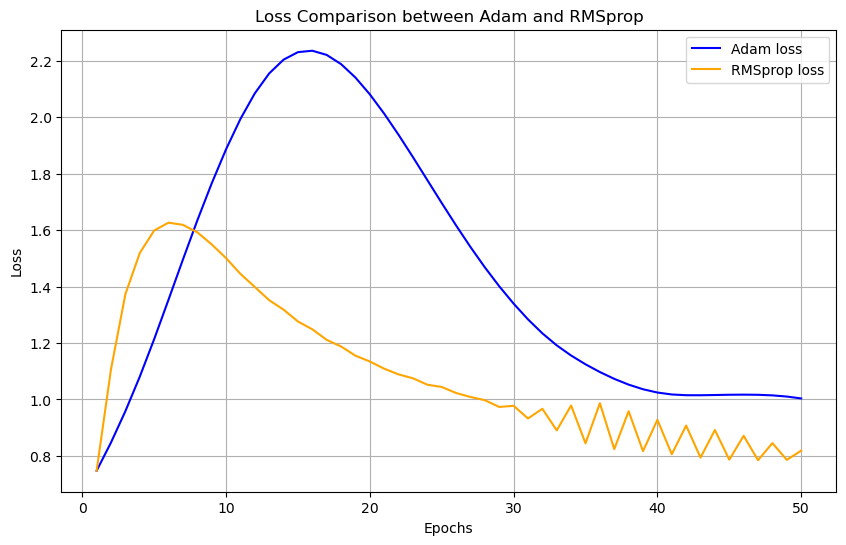

In [143]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """

    print("Training with adam optimizer...")
    _, adam_loss = train_model(X_train, y_train, hidden_size, epochs, learning_rate = 0.001, optimizer="adam")
    print("Training with rmsprop optimizer...")
    _, rms_loss = train_model(X_train, y_train, hidden_size, epochs, learning_rate = 0.001, optimizer="rmsprop")
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), adam_loss, label='Adam loss', color='blue')
    plt.plot(range(1, epochs + 1), rms_loss, label='RMSprop loss', color='orange')
    plt.title('Loss Comparison between Adam and RMSprop')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return adam_loss, rms_loss

adam_loss, rms_loss = compare_optimizers(X_train_flat, y_train, 64)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [144]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters:
        parameters[key] -= learning_rate * gradients["d" + key]
    return parameters

2. Modify the Training Loop


In [145]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss : {loss:.4f}")

    return parameters, loss_history  

3. Experiment with Different Learning Rates


In [146]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    
    losses = {}
    for learning_rate in learning_rates:
        print(f"Training with learning rate: {learning_rate}")
        _, loss = train_model_with_sgd(X_train, y_train, hidden_size, epochs=epochs, learning_rate=learning_rate)
        losses[f"{learning_rate}"] = loss
        print()
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), losses['0.001'], label='0.001', color='blue')
    plt.plot(range(1, epochs + 1), losses['0.01'], label='0.01', color='orange')
    plt.plot(range(1, epochs + 1), losses['0.1'], label='0.1', color='green')
    plt.title('Loss Comparison for different learning rate (SGD)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return losses

Training with learning rate: 0.001
Epoch 0, Loss : 0.7473
Epoch 10, Loss : 0.8478
Epoch 20, Loss : 0.9436
Epoch 30, Loss : 1.0356
Epoch 40, Loss : 1.1237

Training with learning rate: 0.01
Epoch 0, Loss : 0.7473
Epoch 10, Loss : 1.5705
Epoch 20, Loss : 1.8625
Epoch 30, Loss : 1.9005
Epoch 40, Loss : 1.8631

Training with learning rate: 0.1
Epoch 0, Loss : 0.7473
Epoch 10, Loss : 1.5985
Epoch 20, Loss : 1.2258
Epoch 30, Loss : 1.0506
Epoch 40, Loss : 0.9573



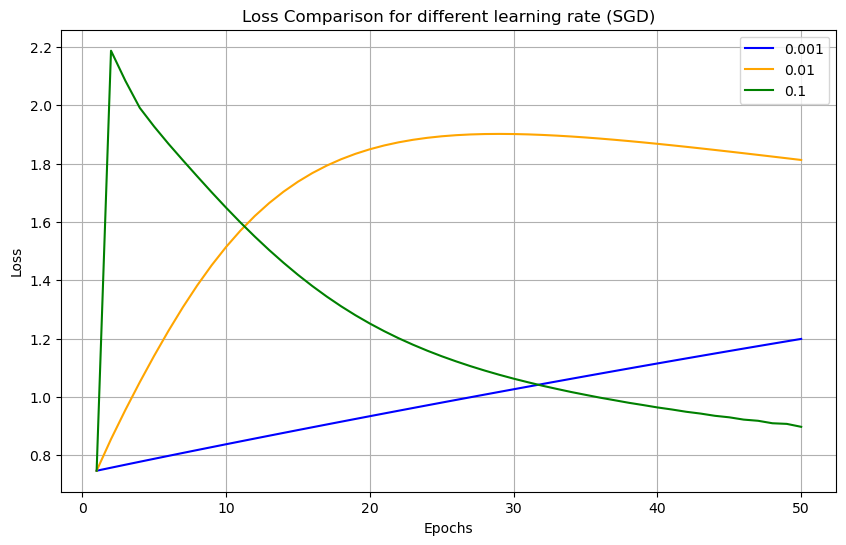

In [147]:
losses = compare_learning_rates(X_train_flat, y_train, 64, epochs=50)

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [148]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    for key in parameters:
        v[key] = np.zeros_like(parameters[key])
    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for key in parameters:
        v[key] = beta * v[key] + (1 - beta) * gradients["d" + key]
        parameters[key] -= learning_rate * v[key]

    return parameters, v

3. Modify the Training Loop


In [149]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    if optimizer == "momentum":
        v = initialize_momentum(parameters)
    loss_history = []
    
    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        if optimizer == "momentum":
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)
        else:
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss : {loss:.4f}")

    return parameters, loss_history

4. Train the Model with Both Optimizers


In [150]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print("Training with Classic SGD...")
    _, loss_sgd = train_model(X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01, optimizer="sgd")
    print("Training with SGD with Momentum...")
    _, loss_momentum = train_model(X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01, optimizer="momentum")
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), loss_sgd, label="SGD", linestyle="-")
    plt.plot(range(1, epochs + 1), loss_momentum, label="Momentum", linestyle="-")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Comparison: SGD vs. Momentum")
    plt.legend()
    plt.grid(True)
    plt.show()

    return loss_sgd, loss_momentum

Training with Classic SGD...
Epoch 0, Loss : 0.7473
Epoch 10, Loss : 1.5705
Epoch 20, Loss : 1.8625
Epoch 30, Loss : 1.9005
Epoch 40, Loss : 1.8631
Training with SGD with Momentum...
Epoch 0, Loss : 0.7473
Epoch 10, Loss : 1.1965
Epoch 20, Loss : 1.9905
Epoch 30, Loss : 2.3805
Epoch 40, Loss : 2.2500


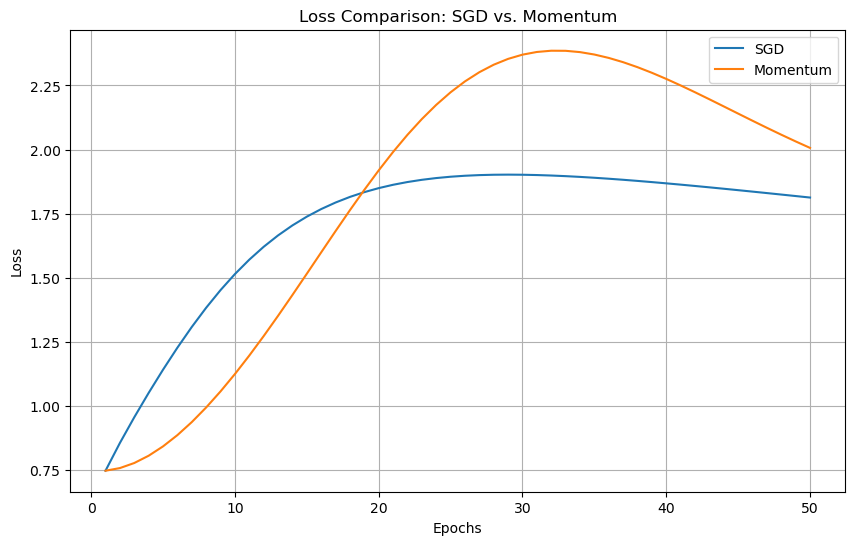

In [151]:
loss_sgd, loss_momentum = compare_sgd_and_momentum(X_train_flat, y_train, 64)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [157]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_hist = []
    accuracy_hist = []
    m = X_train.shape[0]

    for epoch in range(epochs):
        permutation = np.random.permutation(m)
        X_shuffled = X_train[permutation]
        y_shuffled = y_train[permutation]
        epoch_loss = 0
        epoch_accuracy = 0

        for i in range(0, m, batch_size):
            x = X_shuffled[i:i+batch_size]
            y = y_shuffled[i:i+batch_size]
            A2, cache = forward_propagation(x, parameters)

            loss = compute_loss(y, A2)
            epoch_loss += loss * x.shape[0]/m

            epoch_accuracy += np.sum(np.argmax(A2, axis=1) == np.argmax(y, axis=1))/m

            grads = backward_propagation(x, y, parameters, cache)
            parameters = update_parameters_with_sgd(parameters, grads, learning_rate)
        
        loss_hist.append(epoch_loss)
        accuracy_hist.append(epoch_accuracy)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, loss = {epoch_loss:.4f}, accuracy = {epoch_accuracy:.4f}")
    
    return loss_hist, accuracy_hist

2. Train the Model with Different Mini-Batch Sizes


In [160]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    for batch_size in batch_sizes:
        print("Training with mini-batch size: ", batch_size)
        loss_hist, accuracy_hist = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=epochs, learning_rate=0.01, batch_size=batch_size)
        print(f"Final Loss for batch size {batch_size} : {loss_hist[-1]:.4f}")
        print(f"Final Accuracy for batch size {batch_size} : {accuracy_hist[-1]:.4f}")
        print()

In [161]:
compare_mini_batch_sizes(X_train_flat, y_train, 64)

Training with mini-batch size:  16
Epoch 0, loss = 0.7372, accuracy = 0.7511
Epoch 10, loss = 0.3636, accuracy = 0.8770
Epoch 20, loss = 0.3173, accuracy = 0.8930
Epoch 30, loss = 0.2887, accuracy = 0.9038
Epoch 40, loss = 0.2670, accuracy = 0.9117
Final Loss for batch size 16 : 0.2526
Final Accuracy for batch size 16 : 0.9155

Training with mini-batch size:  32
Epoch 0, loss = 0.8587, accuracy = 0.7123
Epoch 10, loss = 0.4134, accuracy = 0.8623
Epoch 20, loss = 0.3599, accuracy = 0.8805
Epoch 30, loss = 0.3299, accuracy = 0.8896
Epoch 40, loss = 0.3082, accuracy = 0.8977
Final Loss for batch size 32 : 0.2935
Final Accuracy for batch size 32 : 0.9022

Training with mini-batch size:  64
Epoch 0, loss = 1.0211, accuracy = 0.6613
Epoch 10, loss = 0.4689, accuracy = 0.8453
Epoch 20, loss = 0.4116, accuracy = 0.8631
Epoch 30, loss = 0.3800, accuracy = 0.8740
Epoch 40, loss = 0.3580, accuracy = 0.8820
Final Loss for batch size 64 : 0.3429
Final Accuracy for batch size 64 : 0.8861



### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [164]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_hist = []
    accuracy_hist = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)
        loss_hist.append(loss)
        accuracy = np.mean(np.argmax(A2, axis=1) == np.argmax(y_train, axis=1))
        accuracy_hist.append(accuracy)

        grads = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, grads, learning_rate)
    
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, loss (Full-Batch) = {loss:.4f}, accuracy = {accuracy:.4f}")
    
    return loss_hist, accuracy_hist


In [165]:
import time
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    print("Training with Mini-Batch Gradient Descent...")
    start_mini = time.time()
    mini_loss, mini_acc = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=epochs, batch_size=batch_size)
    end_mini = time.time()
    time_mini = end_mini - start_mini

    print()
    print("Training with Full-Batch Gradient Descent...")
    start_full = time.time()
    full_loss, full_acc = train_model_full_batch(X_train, y_train, hidden_size, epochs=epochs)
    end_full = time.time()
    time_full = end_full - start_full

    print()

    print(f"Mini-Batch Final Loss: {mini_loss[-1]:.4f}, Final Accuracy: {mini_acc[-1]:.4f}, Time: {time_mini:.4f} seconds")
    print(f"Mini-Batch Final Loss: {full_loss[-1]:.4f}, Final Accuracy: {full_acc[-1]:.4f}, Time: {time_full} seconds")

In [166]:
compare_mini_batch_and_full_batch(X_train_flat, y_train, 64)

Training with Mini-Batch Gradient Descent...
Epoch 0, loss = 0.8587, accuracy = 0.7123
Epoch 10, loss = 0.4134, accuracy = 0.8623
Epoch 20, loss = 0.3599, accuracy = 0.8805
Epoch 30, loss = 0.3299, accuracy = 0.8896
Epoch 40, loss = 0.3082, accuracy = 0.8977

Training with Full-Batch Gradient Descent...
Epoch 0, loss (Full-Batch) = 0.7473, accuracy = 0.1318
Epoch 10, loss (Full-Batch) = 1.5705, accuracy = 0.2047
Epoch 20, loss (Full-Batch) = 1.8625, accuracy = 0.2623
Epoch 30, loss (Full-Batch) = 1.9005, accuracy = 0.3088
Epoch 40, loss (Full-Batch) = 1.8631, accuracy = 0.3611

Mini-Batch Final Loss: 0.2935, Final Accuracy: 0.9022, Time: 33.2929 seconds
Mini-Batch Final Loss: 1.8127, Final Accuracy: 0.4058, Time: 6.53614354133606 seconds
